In [1]:
from PIL import Image, ImageStat
import numpy
import matplotlib.pyplot as plt
import numpy as np

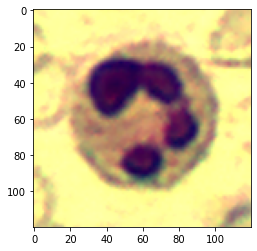

In [2]:
image='C:/Users/Lenovo/Downloads/Pattern Midterm/segmentation_WBC-master/Dataset_1/008.bmp'
im = Image.open(image)
img_width, img_height = im.size
px = im.load()
plt.imshow(im)

In [3]:
def converged(centroids, old_centroids):
    if len(old_centroids) == 0:
        return False

    for i in range(0, len(centroids)):
        cent = centroids[i]
        old_cent = old_centroids[i]

        if ((int(old_cent[0]) - 1) <= cent[0] <= (int(old_cent[0]) + 1)) and ((int(old_cent[1]) - 1) <= cent[1] <= (int(old_cent[1]) + 1)) and ((int(old_cent[2]) - 1) <= cent[2] <= (int(old_cent[2]) + 1)):
            continue
        else:
            return False

    return True

In [4]:
def assignPixels(centroids):
    clusters = {}

    for x in range(0, img_width):
        for y in range(0, img_height):
            p = px[x, y]
            minIndex = getMin(px[x, y], centroids)
        
            try:
                clusters[minIndex].append(p)

            except KeyError:
                clusters[minIndex] = [p]

            
    return clusters

In [5]:
def getMin(pixel, centroids):
    d=0
    minDist = 9999
    minIndex = 0

    for i in range(0, len(centroids)):
        for j in range(3): #3=R,B,G  3D
            d += int((centroids[i][j] - pixel[j]))**2
        d=numpy.sqrt(d)
        if d < minDist:
            minDist = d
            minIndex = i

    return minIndex

In [6]:
def adjustCentroids(clusters):
    new_centroids = []
    keys = sorted(clusters.keys())
#     print(keys)
    for k in keys:
        n = numpy.mean(clusters[k], axis=0)
        new = (int(n[0]), int(n[1]), int(n[2]))
        new_centroids.append(new) #new centroids
    return new_centroids

In [15]:
def Kmeans_Function(k_number):

    centroids = []
    old_centroids =[]
    i = 1
     #random centroids
    [centroids.append(px[numpy.random.randint(0, img_width), numpy.random.randint(0, img_height)]) for k in range(0, k_number)]

    while not converged(centroids, old_centroids) and i <= 20:
        i += 1

        clusters = assignPixels(centroids)
        centroids = adjustCentroids(clusters) 

    return centroids

In [8]:
def drawWindow(result):
    img = Image.new('RGB', (img_width, img_height), "white")
    p = img.load()

    for x in range(img.size[0]):
        for y in range(img.size[1]):
            RGB_value = result[getMin(px[x, y], result)] 
            p[x, y] = RGB_value
    plt.imshow(img)

Enter K value: 3


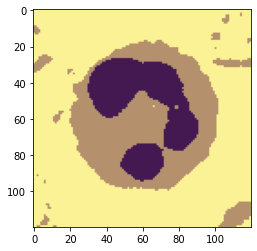

In [16]:
k_input = int(input("Enter K value: "))

result=Kmeans_Function(k_input)
# print(result)
drawWindow(result)